In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd "/gdrive/MyDrive/capstone_project/"

Mounted at /gdrive
/gdrive/MyDrive/capstone_project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [ ]:
seed_everything(42)

In [ ]:
data = pd.read_csv("합천_댐기상종합데이터.csv")
data.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,...,1일전평균습도(%),2일전평균습도(%),3일전평균습도(%),4일전평균습도(%),5일전평균습도(%),6일전평균습도(%),7일전평균습도(%),1일후평균강수량(mm),2일후평균강수량(mm),3일후평균강수량(mm)
0,2000-01-01,7.4,513.4,28.9,173.4,5.8,3.5,5.5,6.9,5.0,...,57.708333,59.375000,67.791667,66.208333,61.750000,63.208333,51.750000,0.000000,0.000000,0.000000
1,2000-01-02,4.4,512.1,23.7,173.0,7.4,5.8,3.5,5.5,6.9,...,63.333333,57.708333,59.375000,67.791667,66.208333,61.750000,63.208333,0.000000,0.000000,0.187500
2,2000-01-03,4.7,509.8,26.1,171.8,4.4,7.4,5.8,3.5,5.5,...,65.208333,63.333333,57.708333,59.375000,67.791667,66.208333,61.750000,0.000000,0.187500,1.020833
3,2000-01-04,3.8,508.4,27.3,171.4,4.7,4.4,7.4,5.8,3.5,...,55.916667,65.208333,63.333333,57.708333,59.375000,67.791667,66.208333,0.187500,1.020833,0.135417
4,2000-01-05,6.1,506.5,25.2,170.4,3.8,4.7,4.4,7.4,5.8,...,56.916667,55.916667,65.208333,63.333333,57.708333,59.375000,67.791667,1.020833,0.135417,0.000000


In [ ]:
data.columns

Index(['시간', '전일유입량', '저수량(현재)', '전일방류량(본댐)', '저수량차이', '2일전유입량', '3일전유입량',
       '4일전유입량', '5일전유입량', '6일전유입량', '7일전유입량', '당일유입량', '1일후유입량', '2일후유입량',
       '평균기온(°C)', '1일전평균기온(°C)', '2일전평균기온(°C)', '3일전평균기온(°C)', '4일전평균기온(°C)',
       '5일전평균기온(°C)', '6일전평균기온(°C)', '7일전평균기온(°C)', '평균강수량(mm)',
       '1일전평균강수량(mm)', '2일전평균강수량(mm)', '3일전평균강수량(mm)', '4일전평균강수량(mm)',
       '5일전평균강수량(mm)', '6일전평균강수량(mm)', '7일전평균강수량(mm)', '평균습도(%)', '1일전평균습도(%)',
       '2일전평균습도(%)', '3일전평균습도(%)', '4일전평균습도(%)', '5일전평균습도(%)', '6일전평균습도(%)',
       '7일전평균습도(%)', '1일후평균강수량(mm)', '2일후평균강수량(mm)', '3일후평균강수량(mm)'],
      dtype='object')

In [ ]:
data = data[["시간", "전일유입량", "저수량(현재)", "전일방류량(본댐)", "저수량차이", "2일전유입량", "3일전유입량", "4일전유입량", "5일전유입량", "6일전유입량", "7일전유입량", 
       "평균기온(°C)", "1일전평균기온(°C)", "2일전평균기온(°C)", "3일전평균기온(°C)", "4일전평균기온(°C)", "5일전평균기온(°C)", "6일전평균기온(°C)", "7일전평균기온(°C)",
       "평균강수량(mm)", "1일전평균강수량(mm)", "2일전평균강수량(mm)", "3일전평균강수량(mm)", "4일전평균강수량(mm)", "5일전평균강수량(mm)", "6일전평균강수량(mm)", "7일전평균강수량(mm)", 
       "평균습도(%)", "1일전평균습도(%)", "2일전평균습도(%)", "3일전평균습도(%)", "4일전평균습도(%)", "5일전평균습도(%)", "6일전평균습도(%)", "7일전평균습도(%)", 
       "1일후평균강수량(mm)", "2일후평균강수량(mm)", "3일후평균강수량(mm)","당일유입량", "1일후유입량", "2일후유입량"]]

In [ ]:
data["시간"] = pd.to_datetime(data["시간"])

In [ ]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for i in range(len(data)):
  if data["시간"][i].year < 2021:
    train_data = train_data.append(data.iloc[i, ])
  else:
    test_data = test_data.append(data.iloc[i, ])

In [ ]:
train_data.shape, test_data.shape

((7671, 41), (825, 41))

In [ ]:
test_data

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,...,4일전평균습도(%),5일전평균습도(%),6일전평균습도(%),7일전평균습도(%),1일후평균강수량(mm),2일후평균강수량(mm),3일후평균강수량(mm),당일유입량,1일후유입량,2일후유입량
7671,2021-01-01,2.0,510.5,15.4,116.4,1.9,4.1,4.1,4.1,1.8,...,92.666667,84.416667,71.541667,58.208333,0.000000,0.000000,0.000000,4.2,2.0,2.0
7672,2021-01-02,4.2,509.4,15.4,116.3,2.0,1.9,4.1,4.1,4.1,...,87.750000,92.666667,84.416667,71.541667,0.000000,0.000000,0.000000,2.0,2.0,2.0
7673,2021-01-03,2.0,508.3,15.4,116.1,4.2,2.0,1.9,4.1,4.1,...,48.583333,87.750000,92.666667,84.416667,0.000000,0.000000,0.000000,2.0,2.0,4.3
7674,2021-01-04,2.0,507.2,15.4,116.0,2.0,4.2,2.0,1.9,4.1,...,52.208333,48.583333,87.750000,92.666667,0.000000,0.000000,0.028846,2.0,4.3,2.1
7675,2021-01-05,2.0,506.1,15.4,115.7,2.0,2.0,4.2,2.0,1.9,...,75.625000,52.208333,48.583333,87.750000,0.000000,0.028846,0.107143,4.3,2.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491,2023-04-01,2.7,212.6,1.3,-113.4,2.6,2.8,3.2,3.3,4.6,...,53.750000,46.791667,66.125000,76.541667,0.223303,0.255882,0.329789,2.3,2.6,3.1
8492,2023-04-02,2.3,212.4,5.0,-113.1,2.7,2.6,2.8,3.2,3.3,...,56.958333,53.750000,46.791667,66.125000,0.255882,0.329789,0.871875,2.6,3.1,3.3
8493,2023-04-03,2.6,212.2,5.0,-112.7,2.3,2.7,2.6,2.8,3.2,...,52.541667,56.958333,53.750000,46.791667,0.329789,0.871875,0.276042,3.1,3.3,3.3
8494,2023-04-04,3.1,212.0,5.0,-112.3,2.6,2.3,2.7,2.6,2.8,...,43.375000,52.541667,56.958333,53.750000,0.871875,0.276042,1.095672,3.3,3.3,3.3


## Train

### 하이퍼파라미터

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


In [ ]:
target_n = 3 # 맞춰야하는 품목/품종의 수
learning_rate = 5e-4 # 학습률
BATCH_SIZE = 128 # 배치사이즈
EPOCHS = 500 # 총 eopochs
teacher_forcing = False # 교사강요 설정
n_layers = 6 # rnn레이어 층
dropout = 0 # 드롭아웃
window_size = 9 # 인코더 시퀀스 길이
future_size = 1 # 디코더 시퀀스 길이
hidden_dim = 128 # rnn 히든차원
save_path = f'./models/best_model.pt' # 모델 저장 경로

In [ ]:
class DamDataset(Dataset):
    def __init__(self, encoder_input, decoder_input):
        self.encoder_input = encoder_input
        self.decoder_input = decoder_input
        
    def __len__(self):
        return len(self.encoder_input)
    
    def __getitem__(self, i):
        return {
            'encoder_input' : torch.tensor(self.encoder_input[i], dtype=torch.float32),
            'decoder_input' : torch.tensor(self.decoder_input[i], dtype=torch.float32)
        }

### 전처리

In [ ]:
data.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,...,4일전평균습도(%),5일전평균습도(%),6일전평균습도(%),7일전평균습도(%),1일후평균강수량(mm),2일후평균강수량(mm),3일후평균강수량(mm),당일유입량,1일후유입량,2일후유입량
0,2000-01-01,7.4,513.4,28.9,173.4,5.8,3.5,5.5,6.9,5.0,...,66.208333,61.750000,63.208333,51.750000,0.000000,0.000000,0.000000,4.4,4.7,3.8
1,2000-01-02,4.4,512.1,23.7,173.0,7.4,5.8,3.5,5.5,6.9,...,67.791667,66.208333,61.750000,63.208333,0.000000,0.000000,0.187500,4.7,3.8,6.1
2,2000-01-03,4.7,509.8,26.1,171.8,4.4,7.4,5.8,3.5,5.5,...,59.375000,67.791667,66.208333,61.750000,0.000000,0.187500,1.020833,3.8,6.1,8.0
3,2000-01-04,3.8,508.4,27.3,171.4,4.7,4.4,7.4,5.8,3.5,...,57.708333,59.375000,67.791667,66.208333,0.187500,1.020833,0.135417,6.1,8.0,6.4
4,2000-01-05,6.1,506.5,25.2,170.4,3.8,4.7,4.4,7.4,5.8,...,63.333333,57.708333,59.375000,67.791667,1.020833,0.135417,0.000000,8.0,6.4,5.9


In [ ]:
data.iloc[:,2:-3].columns

Index(['저수량(현재)', '전일방류량(본댐)', '저수량차이', '2일전유입량', '3일전유입량', '4일전유입량', '5일전유입량',
       '6일전유입량', '7일전유입량', '평균기온(°C)', '1일전평균기온(°C)', '2일전평균기온(°C)',
       '3일전평균기온(°C)', '4일전평균기온(°C)', '5일전평균기온(°C)', '6일전평균기온(°C)',
       '7일전평균기온(°C)', '평균강수량(mm)', '1일전평균강수량(mm)', '2일전평균강수량(mm)',
       '3일전평균강수량(mm)', '4일전평균강수량(mm)', '5일전평균강수량(mm)', '6일전평균강수량(mm)',
       '7일전평균강수량(mm)', '평균습도(%)', '1일전평균습도(%)', '2일전평균습도(%)', '3일전평균습도(%)',
       '4일전평균습도(%)', '5일전평균습도(%)', '6일전평균습도(%)', '7일전평균습도(%)', '1일후평균강수량(mm)',
       '2일후평균강수량(mm)', '3일후평균강수량(mm)'],
      dtype='object')

In [ ]:
data.iloc[:, -3:].columns

Index(['당일유입량', '1일후유입량', '2일후유입량'], dtype='object')

In [ ]:
x_data = []
y_data = []
for i in range(train_data.shape[0]-window_size-future_size):
  x = train_data.iloc[i:i+window_size, 2:-3].to_numpy()
  y = train_data.iloc[i+window_size:i+window_size+future_size, -3:].to_numpy()
  y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
  x_data.append(x)
  y_data.append(np.concatenate([y_0, y], axis=0))
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
x_data.shape, y_data.shape

((7661, 9, 36), (7661, 2, 3))

In [ ]:
train_test_split = 2000
x_train = x_data[:-train_test_split-future_size]
y_train = y_data[:-train_test_split-future_size]
x_val = x_data[-train_test_split:]
y_val = y_data[-train_test_split:]

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((5660, 9, 36), (5660, 2, 3), (2000, 9, 36), (2000, 2, 3))

In [ ]:
train_dataset = DamDataset(x_train, y_train)
val_dataset = DamDataset(x_val, y_val)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=16, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=16, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
sample_batch = next(iter(train_dataloader))

In [ ]:
sample_batch['encoder_input'].shape, sample_batch['decoder_input'].shape

(torch.Size([128, 9, 36]), torch.Size([128, 2, 3]))

### 모델

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, dropout):
        super().__init__()
        self.n_layers = n_layers
        
        self.rnn = nn.GRU(input_dim, hidden_dim, n_layers, dropout=dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, inp_seq):
        inp_seq = inp_seq.permute(1,0,2)
        outputs, hidden = self.rnn(inp_seq)
        
        return outputs, hidden

In [ ]:
class BahdanauAttention(nn.Module):
    def __init__(self, dec_output_dim, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = nn.Linear(dec_output_dim, units)
        self.W2 = nn.Linear(dec_output_dim, units)
        self.V = nn.Linear(dec_output_dim, 1)

    def forward(self, hidden, enc_output):
        query_with_time_axis = hidden.unsqueeze(1)
        
        score = self.V(torch.tanh(self.W1(query_with_time_axis) + self.W2(enc_output)))
        
        attention_weights = torch.softmax(score, axis=1)
        
        context_vector = attention_weights * enc_output
        context_vector = torch.sum(context_vector, dim=1)

        return context_vector, attention_weights

In [ ]:
class Decoder(nn.Module):
    def __init__(self, dec_feature_size, encoder_hidden_dim, output_dim, decoder_hidden_dim, n_layers, dropout, attention):
        super().__init__()
        self.output_dim = output_dim
        self.decoder_hidden_dim = decoder_hidden_dim
        self.n_layers = n_layers
        self.attention = attention
        
        self.layer = nn.Linear(dec_feature_size, encoder_hidden_dim)
        self.rnn = nn.GRU(encoder_hidden_dim*2, decoder_hidden_dim, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, enc_output, dec_input, hidden):
        dec_input = self.layer(dec_input)
        context_vector, attention_weights = self.attention(hidden, enc_output)
        dec_input = torch.cat([torch.sum(context_vector, dim=0), dec_input], dim=1)
        dec_input = dec_input.unsqueeze(0)
        
        output, hidden = self.rnn(dec_input, hidden)

        prediction = self.fc_out(output.sum(0))
        
        return prediction, hidden

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, attention):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, encoder_input, decoder_input, teacher_forcing=False):
        batch_size = decoder_input.size(0)
        trg_len = decoder_input.size(1)
        
        outputs = torch.zeros(batch_size, trg_len-1, self.decoder.output_dim).to(device)
        enc_output, hidden = self.encoder(encoder_input)
        
        dec_input = decoder_input[:, 0]
        for t in range(1, trg_len):
            output, hidden = self.decoder(enc_output, dec_input, hidden)
            outputs[:, t-1] = output
            if teacher_forcing == True:
                dec_input = decoder_input[:, t]
            else:
                dec_input = output
        
        return outputs

In [ ]:
encoder = Encoder(input_dim=x_data.shape[-1], hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout)
attention = BahdanauAttention(dec_output_dim=hidden_dim, units=hidden_dim)
decoder = Decoder(
    dec_feature_size=target_n, encoder_hidden_dim=hidden_dim, output_dim=target_n,
    decoder_hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout,
    attention = attention
)

model = Seq2Seq(encoder, decoder, attention)
model = model.to(device)

In [ ]:
def my_custom_metric(pred, true):
    target = torch.where(true!=0)
    true = true[target]
    pred = pred[target]
    score = torch.mean(torch.abs((true-pred))/(true))
    
    return score

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.L1Loss() # mae
custom_metric = my_custom_metric

In [ ]:
def train_step(batch_item, epoch, batch, training, teacher_forcing):
    encoder_input = batch_item['encoder_input'].to(device)
    decoder_input = batch_item['decoder_input'].to(device)
    if training is True:
        model.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(encoder_input, decoder_input, teacher_forcing)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        loss.backward()
        optimizer.step()
        
        return loss, score
    else:
        model.eval()
        with torch.no_grad():
            output = model(encoder_input, decoder_input, False)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        return loss, score

In [ ]:
loss_plot, val_loss_plot = [], []
score_plot, val_score_plot = [], []

for epoch in range(EPOCHS):
    total_loss, total_val_loss = 0, 0
    total_score, total_val_score = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_loss += batch_loss
        total_score += batch_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1)),
            'Score': '{:06f}'.format(batch_score.item()),
            'Total Score' : '{:06f}'.format(total_score/(batch+1)),
        })
    loss_plot.append(total_loss/(batch+1))
    score_plot.append(total_score/(batch+1))
    
    tqdm_dataset = tqdm(enumerate(val_dataloader))
    training = False
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_val_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_val_loss += batch_loss
        total_val_score += batch_val_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Val Loss': '{:06f}'.format(batch_loss.item()),
            'Total Val Loss' : '{:06f}'.format(total_val_loss/(batch+1)),
            'Val Score': '{:06f}'.format(batch_val_score.item()),
            'Total Val Score' : '{:06f}'.format(total_val_score/(batch+1)),
        })
    val_loss_plot.append(total_val_loss/(batch+1))
    val_score_plot.append(total_val_score/(batch+1))

    if min(val_loss_plot) == val_loss_plot[-1]:
        torch.save(model, save_path)

45it [00:01, 24.42it/s, Epoch=1, Loss=20.173140, Total Loss=19.465851, Score=1.752620, Total Score=0.909461]
16it [00:00, 29.50it/s, Epoch=1, Val Loss=1.939542, Total Val Loss=15.954765, Val Score=0.556870, Total Val Score=1.110208]
45it [00:00, 51.05it/s, Epoch=2, Loss=10.686403, Total Loss=18.223980, Score=1.598454, Total Score=1.141330]
16it [00:00, 31.82it/s, Epoch=2, Val Loss=2.384074, Total Val Loss=15.907516, Val Score=0.729766, Total Val Score=1.290756]
45it [00:00, 50.17it/s, Epoch=3, Loss=19.566238, Total Loss=18.363745, Score=1.478464, Total Score=1.198297]
16it [00:00, 31.55it/s, Epoch=3, Val Loss=2.369009, Total Val Loss=15.907476, Val Score=0.724946, Total Val Score=1.286287]
45it [00:01, 35.42it/s, Epoch=4, Loss=7.304111, Total Loss=18.150932, Score=2.878118, Total Score=1.231186]
16it [00:00, 20.81it/s, Epoch=4, Val Loss=2.396518, Total Val Loss=15.907591, Val Score=0.733640, Total Val Score=1.294080]
45it [00:00, 45.11it/s, Epoch=5, Loss=18.949982, Total Loss=18.354080

KeyboardInterrupt: ignored

In [ ]:
for i in range(len(loss_plot)):
  loss_plot[i] = loss_plot[i].cpu().detach().numpy()
for i in range(len(val_loss_plot)):
  val_loss_plot[i] = val_loss_plot[i].cpu().detach().numpy()
for i in range(len(score_plot)):
  score_plot[i] = score_plot[i].cpu().detach().numpy()
for i in range(len(val_score_plot)):
  val_score_plot[i] = val_score_plot[i].cpu().detach().numpy()

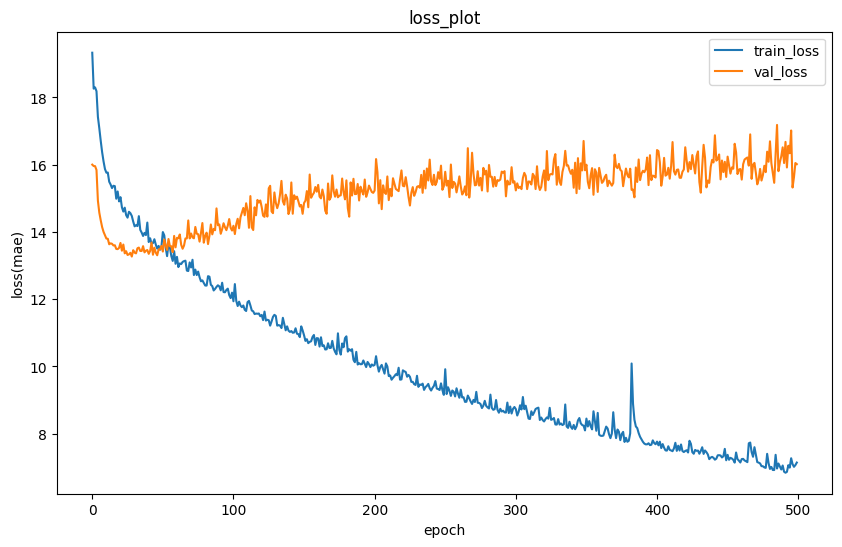

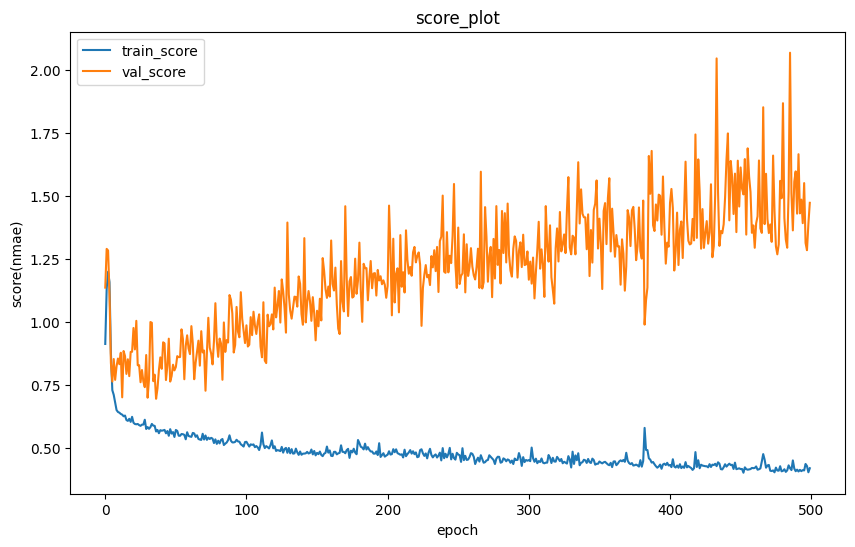

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss(mae)')
plt.title('loss_plot')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(score_plot, label='train_score')
plt.plot(val_score_plot, label='val_score')
plt.xlabel('epoch')
plt.ylabel('score(nmae)')
plt.title('score_plot')
plt.legend()
plt.show()

## Test

In [ ]:
test_data.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,평균기온(°C),평균강수량(mm),평균습도(%),당일유입량,1일후유입량,2일후유입량
7671,2021-01-01,2.0,510.5,15.4,116.4,1.9,4.1,-2.6000,0.0,75.625000,4.2,2.0,2.0
7672,2021-01-02,4.2,509.4,15.4,116.3,2.0,1.9,-1.2875,0.0,65.375000,2.0,2.0,2.0
7673,2021-01-03,2.0,508.3,15.4,116.1,4.2,2.0,-2.4875,0.0,57.708333,2.0,2.0,4.3
7674,2021-01-04,2.0,507.2,15.4,116.0,2.0,4.2,-2.2750,0.0,69.041667,2.0,4.3,2.1
7675,2021-01-05,2.0,506.1,15.4,115.7,2.0,2.0,-0.7750,0.0,58.916667,4.3,2.1,2.1


In [ ]:
x_test = []
y_test = []
for i in range(test_data.shape[0]):
  x = test_data.iloc[i, 1:-3].to_numpy()
  y = test_data.iloc[i, -3:]
  x_test.append(x)
  y_test.append(y)
x_test_data = np.array(x_test)
y_test_data = np.array(y_test)
len(x_test_data)

825

In [ ]:
test_dataset = DamDataset(x_test, y_test)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, num_workers=16, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
model = torch.load(save_path)
model = model.to(device)
model.train()

Seq2Seq(
  (encoder): Encoder(
    (rnn): GRU(9, 128, num_layers=3, dropout=0.2)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (attention): BahdanauAttention(
      (W1): Linear(in_features=128, out_features=128, bias=True)
      (W2): Linear(in_features=128, out_features=128, bias=True)
      (V): Linear(in_features=128, out_features=1, bias=True)
    )
    (layer): Linear(in_features=3, out_features=128, bias=True)
    (rnn): GRU(256, 128, num_layers=3, dropout=0.2)
    (fc_out): Linear(in_features=128, out_features=3, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [ ]:
print(model)

Seq2Seq(
  (encoder): Encoder(
    (rnn): GRU(9, 128, num_layers=3, dropout=0.2)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (attention): BahdanauAttention(
      (W1): Linear(in_features=128, out_features=128, bias=True)
      (W2): Linear(in_features=128, out_features=128, bias=True)
      (V): Linear(in_features=128, out_features=1, bias=True)
    )
    (layer): Linear(in_features=3, out_features=128, bias=True)
    (rnn): GRU(256, 128, num_layers=3, dropout=0.2)
    (fc_out): Linear(in_features=128, out_features=3, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)


In [ ]:
def predict(encoder_input):
    model.train()
    encoder_input = encoder_input.to(device)
    decoder_input = torch.zeros([1, future_size+1, target_n], dtype=torch.float32).to(device)
    with torch.no_grad():
        output = model(encoder_input, decoder_input, False)
    return output.cpu()

In [ ]:
from datetime import datetime

In [ ]:
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [date.strftime("%Y-%m-%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates
    
test_dates_list = date_range("2021-01-01", "2023-04-05")
print(test_dates_list)
print(len(test_dates_list))

['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021

In [ ]:
len(test_dates_list), len(x_test_data)

(825, 825)

In [ ]:
encoder = Encoder(input_dim=x_test_data.shape[-1], hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout)
attention = BahdanauAttention(dec_output_dim=hidden_dim, units=hidden_dim)
decoder = Decoder(
    dec_feature_size=target_n, encoder_hidden_dim=hidden_dim, output_dim=target_n,
    decoder_hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout,
    attention = attention
)

model = Seq2Seq(encoder, decoder, attention)
model = model.to(device)

In [ ]:
def my_custom_metric(pred, true):
    target = torch.where(true!=0)
    true = true[target]
    pred = pred[target]
    score = torch.mean(torch.abs((true-pred))/(true))
    
    return score

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.L1Loss() # mae
#custom_metric = my_custom_metric

In [ ]:
def test_step(batch_item, epoch):
    encoder_input = batch_item['encoder_input'].to(device)
    decoder_input = batch_item['decoder_input'].to(device)
    
    model.eval()
    with torch.no_grad():
      output = model(encoder_input, decoder_input, False)
      return output

In [ ]:
test_output = []
    
tqdm_dataset = tqdm(enumerate(test_dataloader))
training = False

for batch, item in tqdm_dataset:
  output = test_step(item, 1)
  test_output.append(output)

In [ ]:
test_step(test_dataloader, 1)

TypeError: ignored

In [ ]:
output1 = [] #당일, 1일, 2일 예측
output2 = [] #당일만 예측

for i in range(len(test_output)):
  test_output[i] = test_output[i].cpu()
  output1.append(test_output[i][:, 0, :])
  output2.append(test_output[i][0, :, 0])

In [ ]:
len(output1), len(output2)

(813, 813)

In [ ]:
for i in range(len(output2)):
  output2[i] = output2[i][0]

In [ ]:
for i in range(0, len(output1), 3):
  output1.append(output1[i][0].tolist())

In [ ]:
len(output1), len(output2)

(1084, 813)

In [ ]:
data.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,평균기온(°C),평균강수량(mm),평균습도(%),당일유입량,1일후유입량,2일후유입량
0,2000-01-01,7.4,513.4,28.9,173.4,5.8,3.5,4.000000,0.0000,63.333333,4.4,4.7,3.8
1,2000-01-02,4.4,512.1,23.7,173.0,7.4,5.8,7.133333,0.0000,65.208333,4.7,3.8,6.1
2,2000-01-03,4.7,509.8,26.1,171.8,4.4,7.4,2.062500,0.0000,55.916667,3.8,6.1,8.0
3,2000-01-04,3.8,508.4,27.3,171.4,4.7,4.4,0.829167,0.0000,56.916667,6.1,8.0,6.4
4,2000-01-05,6.1,506.5,25.2,170.4,3.8,4.7,3.900000,0.1875,62.791667,8.0,6.4,5.9


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data["당일유입량"], data["시간"], label="true")
plt.plot(data, label='val_score')
plt.xlabel('epoch')
plt.ylabel('score(nmae)')
plt.title('score_plot')
plt.legend()
plt.show()